In [1]:
import numpy as np
np.random.seed(0)
import tensorflow as tf

##### Using some higher level tools to do training stuffs

In [2]:
N, D, H = 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N,D))
y = tf.placeholder(tf.float32, shape=(N,D))

##### 1, Use Xavier initializer
##### 2, `tf.layers` automatically sets up weight and bias for us!

In [3]:
init = tf.contrib.layers.xavier_initializer()
h = tf.layers.dense(inputs = x, units = H, 
                   activation = tf.nn.relu,
                   kernel_initializer = init)
y_pred = tf.layers.dense(inputs = h, units = D,
                        kernel_initializer = init)

###### Define loss function, optimizer and updates:

In [4]:
loss = tf.losses.mean_squared_error(y_pred, y)
optimizer = tf.train.GradientDescentOptimizer(1.e0)
updates = optimizer.minimize(loss)

##### Do training

In [8]:
t_list = []
l_list = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {
        x: np.random.randn(N,D),
        y: np.random.randn(N,D),
    }
    for t in range(50):
        loss_val, _ = sess.run([loss, updates], feed_dict = values)
        t_list.append(t)
        l_list.append(loss_val)

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 

mpl.rc('font',family='Times New Roman',size = 25)
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2

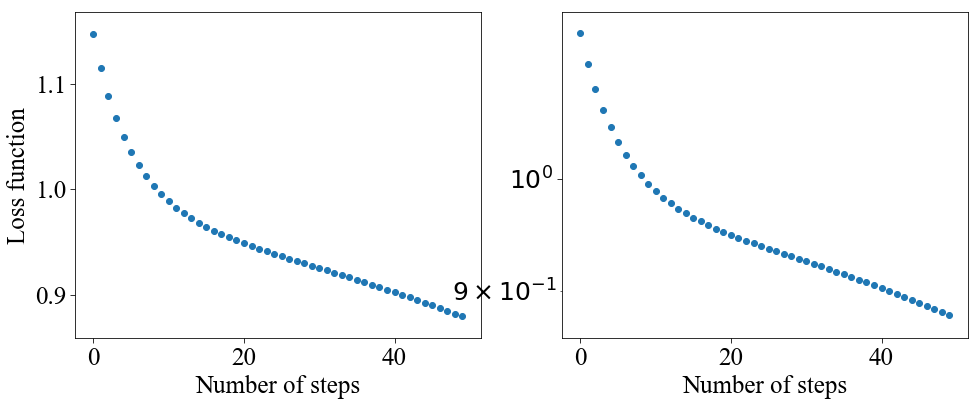

In [10]:
fig,ax  = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(t_list, l_list)
ax[0].set_xlabel("Number of steps")
ax[0].set_ylabel("Loss function")
ax[1].scatter(t_list, l_list)
ax[1].set_xlabel("Number of steps")
#ax[1].set_ylabel("Loss function")
ax[1].set_yscale("log")
plt.show()